In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
house_price = pd.read_csv("House_Price.csv")

In [3]:
house_price.sample(5)

,Unnamed: 0,Address,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards
6928,7718,"Clifton - Block 9, Clifton",41000000.0,3.0,3.0,200
3417,3768,"Capital Cooperative Housing Society, Scheme 33...",32500000.0,6.0,6.0,120
10893,12595,"Askari 5 - Sector J, Askari 5",45000000.0,4.0,4.0,367
9081,10325,"Askari 5 - Sector H, Askari 5",85400000.0,5.0,5.0,427
5194,5785,other,10500000.0,2.0,2.0,106


In [4]:
# sns.pairplot(house_price, y_vars=["Price"], x_vars=["NoOfBedrooms", "NoOfBathrooms", "AreaSqYards"], hue=["Price"])

In [5]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16849 entries, 0 to 16848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     16849 non-null  int64  
 1   Address        16849 non-null  object 
 2   Price          16849 non-null  float64
 3   NoOfBedrooms   16849 non-null  float64
 4   NoOfBathrooms  16849 non-null  float64
 5   AreaSqYards    16849 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 789.9+ KB


In [6]:
house_price.drop(columns=["Unnamed: 0"] , inplace=True)

In [7]:
house_price.rename(columns={"Price" : "Price(Lacs)", "NoOfBedrooms" : "Bedrooms","NoOfBathrooms": "Bathrooms", "AreaSqYards":"Area(Sq.Yards)"},
                   inplace=True)

In [8]:
house_price["Price(Lacs)"] = house_price.apply(lambda x : x["Price(Lacs)"]/100000, axis=1)

In [9]:
house_price.sample(5)

,Address,Price(Lacs),Bedrooms,Bathrooms,Area(Sq.Yards)
16137,"PECHS Block 2, PECHS",185.0,2.0,2.0,120
8391,other,1900.0,5.0,6.0,600
8429,"Askari 5, Malir Cantonment",465.0,4.0,4.0,330
4762,"Askari 5 - Sector H, Askari 5",890.0,5.0,5.0,427
11990,"Harmain Royal Residency, Gulshan-e-Iqbal Town",175.0,3.0,3.0,156


In [10]:
# styled_df = house_price.style.set_properties(subset=["Address"],**{"text-align" : "Left"})
# styled_df

In [11]:
# house_price["Address"] = house_price["Address"].replace("other", np.nan)

In [12]:
house_price = house_price.loc[house_price["Address"] != "other"].copy()
house_price["Area"] = house_price.apply(lambda x : x["Address"].replace(",", ""), axis=1)

In [13]:
house_price["Area"] = house_price.apply(lambda x: str((x["Area"].split(" "))[0] +" "+ (x["Area"].split(" "))[1]), axis=1).copy()

In [14]:
temp_area = house_price["Area"].unique()

In [15]:
temp_area_dict = {temp_area[i]: temp_area[i] for i in range(len(temp_area))}
temp_area_dict

{'Bahria Town': 'Bahria Town',
 'Bahria Paradise': 'Bahria Paradise',
 'Askari 5': 'Askari 5',
 'North Nazimabad': 'North Nazimabad',
 'Surjani Town': 'Surjani Town',
 'Garden West': 'Garden West',
 'Garden East': 'Garden East',
 'Shaheed Millat': 'Shaheed Millat',
 'Bahria Heights': 'Bahria Heights',
 'Saima Arabian': 'Saima Arabian',
 'Bahria Apartments': 'Bahria Apartments',
 'Gulistan-e-Jauhar -': 'Gulistan-e-Jauhar -',
 'Bahria Sports': 'Bahria Sports',
 'PECHS Block': 'PECHS Block',
 'Gulshan-e-Iqbal -': 'Gulshan-e-Iqbal -',
 'DHA Phase': 'DHA Phase',
 'Malir Cantonment': 'Malir Cantonment',
 'North Karachi': 'North Karachi',
 'Federal B': 'Federal B',
 'Rafi Premier': 'Rafi Premier',
 'Bukhari Commercial': 'Bukhari Commercial',
 'Clifton -': 'Clifton -',
 'Clifton Karachi': 'Clifton Karachi',
 'Civil Lines': 'Civil Lines',
 'Falcon Complex': 'Falcon Complex',
 'Navy Housing': 'Navy Housing',
 'Capital Cooperative': 'Capital Cooperative',
 'Emaar Reef': 'Emaar Reef',
 'Mashraqi S

In [16]:
area_dict = {'Bahria Town': 'Bahria Town',
 'Bahria Paradise': 'Bahria Paradise',
 'Askari 5': 'Askari 5',
 'North Nazimabad': 'North Nazimabad',
 'Surjani Town': 'Surjani Town',
 'Garden West': 'Garden West',
 'Garden East': 'Garden East',
 'Shaheed Millat': 'Shaheed Millat',
 'Bahria Heights': 'Bahria Heights',
 'Saima Arabian': 'Saima Arabian',
 'Bahria Apartments': 'Bahria Apartments',
 'Gulistan-e-Jauhar -': 'Gulistan-e-Jauhar',
 'Bahria Sports': 'Bahria Sports',
 'PECHS Block': 'PECHS',
 'Gulshan-e-Iqbal -': 'Gulshan-e-Iqbal',
 'DHA Phase': 'DHA',
 'Malir Cantonment': 'Malir Cantonment',
 'North Karachi': 'North Karachi',
 'Federal B': 'Federal B Area',
 'Rafi Premier': 'Rafi Premier',
 'Bukhari Commercial': 'Bukhari Commercial',
 'Clifton -': 'Clifton',
 'Clifton Karachi': 'Clifton',
 'Civil Lines': 'Civil Lines',
 'Falcon Complex': 'Falcon Complex',
 'Navy Housing': 'Navy Housing',
 'Capital Cooperative': 'Capital Cooperative',
 'Emaar Reef': 'Emaar Reef',
 'Mashraqi Society': 'Mashraqi Society',
 'Scheme 33': 'Scheme 33',
 'Gulshan-e-Maymar Gadap': 'Gulshan-e-Maymar Gadap',
 'DOHS Phase': 'DOHS Phase',
 'Punjabi Saudagar': 'Punjabi Saudagar',
 'Defence View': 'Defence View',
 'Gwalior Cooperative': 'Gwalior Cooperative',
 'Karachi University': 'Karachi University',
 'Emaar Crescent': 'Emaar Crescent',
 'Gulshan-e-Maymar -': 'Gulshan-e-Maymar',
 'Bahria Hills': 'Bahria Hills',
 'Emaar Panorama': 'Emaar Panorama',
 'Shamsi Society': 'Shamsi Society',
 'Sanober Twin': 'Sanober Twin',
 'Ittehad Commercial': 'Ittehad Commercial',
 'Tauheed Commercial': 'Tauheed Commercial',
 'Emaar The': 'Emaar The',
 'Sector 25-A': 'Sector 25-A',
 'Falaknaz Dreams': 'Falaknaz Dreams',
 'Gulshan-e-Iqbal Gulshan-e-Iqbal': 'Gulshan-e-Iqbal',
 'North Town': 'North Town',
 'Bahria Homes': 'Bahria Homes',
 'Emaar Pearl': 'Emaar Pearl',
 'Emaar Coral': 'Emaar Coral',
 'Amir Khusro': 'Amir Khusro',
 'Nazimabad -': 'Nazimabad',
 'Bath Island': 'Bath Island',
 'Gulshan-e-Iqbal Town': 'Gulshan-e-Iqbal',
 'Creek Vista': 'Creek Vista',
 'Lakhani Fantasia': 'Lakhani Fantasia',
 'Gulshan-e-Jamal Gulshan-e-Iqbal': 'Gulshan-e-Jamal',
 'Naya Nazimabad': 'Naya Nazimabad',
 'Malir Karachi': 'Malir',
 'Pilibhit Cooperative': 'Pilibhit Cooperative',
 'Saadi Town': 'Saadi Town',
 'Bahadurabad Gulshan-e-Iqbal': 'Bahadurabad',
 'University Road': 'University Road',
 'Shahra-e-Faisal Karachi': 'Shahra-e-Faisal',
 'Jinnah Avenue': 'Jinnah Avenue',
 'Sharfabad Gulshan-e-Iqbal': 'Sharfabad',
 'Badar Commercial': 'Badar Commercial',
 'Frere Town': 'Frere Town',
 'Nishat Commercial': 'Nishat Commercial',
 'Al-Murtaza Commercial': 'Al-Murtaza Commercial',
 'Allahwala Town': 'Allahwala Town',
 'Askari 4': 'Askari 4',
 'Muslim Commercial': 'Muslim Commercial',
 'Shaz Residency': 'Shaz Residency',
 'Gulzar-e-Hijri Scheme': 'Gulzar-e-Hijri',
 'Government Teacher': 'Government Teacher',
 'Rahat Commercial': 'Rahat Commercial',
 'Sehar Commercial': 'Sehar Commercial',
 'Falaknaz Presidency': 'Falaknaz Presidency',
 'Saima Presidency': 'Saima Presidency',
 'Mehmoodabad Karachi': 'Mehmoodabad',
 'Sea View': 'Sea View',
 'Sector 32': 'Sector 32',
 'Gohar Green': 'Gohar Green',
 'HMR Waterfront': 'HMR Waterfront',
 'Fatima Golf': 'Fatima Golf',
 'Sadat-e-Amroha Coop': 'Sadat-e-Amroha',
 'Dhoraji Colony': 'Dhoraji Colony',
 'Harmain Royal': 'Harmain Royal',
 'De Comforts': 'De Comforts',
 'City Tower': 'City Tower',
 'State Bank': 'State Bank',
 'Saima Jinnah': 'Saima Jinnah',
 'Gulistan-e-Jauhar Karachi': 'Gulistan-e-Jauhar',
 'Saima Royal': 'Saima Royal',
 'Quetta Town': 'Quetta Town',
 'Model Colony': 'Model Colony',
 'Saima Elite': 'Saima Elite',
 'Tariq Road': 'Tariq Road',
 'Grey Noor': 'Grey Noor',
 'Lucky One': 'Lucky One',
 'Airport Karachi': 'Airport',
 'Jamshed Road': 'Jamshed Road',
 'Diamond City': 'Diamond City',
 'KDA Officers': 'KDA Officers',
 'Diamond Residency': 'Diamond Residency',
 'Shah Latif': 'Shah Latif',
 'Shahmir Residency': 'Shahmir Residency',
 'Korangi -': 'Korangi',
 'Nazimabad 1': 'Nazimabad 1',
 'Noman Residencia': 'Noman Residencia',
 'Karachi Administration': 'Karachi Administration',
 'Bisma Greens': 'Bisma Greens',
 'Saadi Garden': 'Saadi Garden',
 'Lateef Duplex': 'Lateef Duplex',
 'Mohammad Ali': 'Mohammad Ali',
 'Shadman Town': 'Shadman Town',
 'Amil Colony': 'Amil Colony',
 'Nazimabad Karachi': 'Nazimabad',
 'Khalid Bin': 'Khalid Bin',
 'Cantt Bazar': 'Cantt Bazar',
 'Bahria Central': 'Bahria Central',
 'Gulshan-e-Usman Housing': 'Gulshan-e-Usman Housing',
 'Madras Cooperative': 'Madras Cooperative',
 'Korangi Karachi': 'Korangi',
 'Safari Enclave': 'Safari Enclave',
 'Daniyal Residency': 'Daniyal Residency',
 'SMCHS -': 'SMCHS',
 'ARY Laguna': 'ARY Laguna',
 'Nazimabad 3': 'Nazimabad 3',
 'Chapal Courtyard': 'Chapal Courtyard',
 'Hill Park': 'Hill Park',
 'Gulshan-e-Roomi Faisal': 'Gulshan-e-Roomi',
 'Tulip Tower': 'Tulip Tower',
 'P &': 'P &',
 'Saima Luxury': 'Saima Luxury',
 'Mehmoodabad Number': 'Mehmoodabad',
 'Diamond Tower': 'Diamond Tower',
 'Salafia Society': 'Salafia Society',
 'PECHS Jamshed': 'PECHS Jamshed',
 'Adamjee Nagar': 'Adamjee Nagar',
 'Gulshan-e-Kaneez Fatima': 'Gulshan-e-Kaneez Fatima',
 'Al Amin': 'Al Amin',
 'Tariq Bin': 'Tariq Bin',
 'Musalmanan-E-Punjab Cooperative': 'Musalmanan-E-Punjab Cooperative',
 'KDA Scheme': 'KDA Scheme',
 'Gulshan-e-Rafi Malir': 'Gulshan-e-Rafi Malir',
 'Sector 31': 'Sector 31',
 'Gulshan-e-Ghazian Scheme': 'Gulshan-e-Ghazian Scheme',
 'Delhi Colony': 'Delhi Colony',
 'Saima Villas': 'Saima Villas'}

In [17]:
def clean_area(area_name):
    return area_dict.get(area_name, area_name)

# Apply the function to the 'Area' column only
house_price["Area"] = house_price["Area"].apply(clean_area)

In [18]:
house_price.sample(5)

,Address,Price(Lacs),Bedrooms,Bathrooms,Area(Sq.Yards),Area
16307,"Gulshan-e-Maymar - Sector Z, Gulshan-e-Maymar",80.0,2.0,2.0,108,Gulshan-e-Maymar
7005,"Sehar Commercial Area, DHA Phase 7",225.0,3.0,3.0,194,Sehar Commercial
2901,"Gulistan-e-Jauhar - Block 2, Gulistan-e-Jauhar",425.0,6.0,6.0,200,Gulistan-e-Jauhar
8735,"Gulshan-e-Ghazian, Scheme 33 - Sector 51-A",99.0,3.0,3.0,156,Gulshan-e-Ghazian Scheme
8897,"DHA Phase 4, DHA Defence",1200.0,5.0,6.0,250,DHA


In [19]:
# house_price.loc[house_price["Area"] == "Gulistan-e-Jauhar -", ["Area"]] = "Gulistan-e-Jauhar"

# 1 Bed Appartments

In [21]:
data1Bed = house_price.loc[house_price["Bedrooms"] == 1]
# data1Bed = house_price[house_price["Bedrooms"] == 1]
data1Bed

,Address,Price(Lacs),Bedrooms,Bathrooms,Area(Sq.Yards),Area
0,"Bahria Town Karachi, Karachi",42.00,1.0,1.0,60,Bahria Town
14,"Surjani Town, Gadap Town",25.00,1.0,1.0,47,Surjani Town
47,"Bahria Apartments, Bahria Town Karachi",50.35,1.0,1.0,59,Bahria Apartments
209,"North Karachi - Sector 11A, North Karachi",24.00,1.0,1.0,44,North Karachi
215,"Bahria Town - Precinct 8, Bahria Town Karachi",62.00,1.0,1.0,64,Bahria Town
...,...,...,...,...,...,...
16536,"Lakhani Fantasia, Scheme 33",48.00,1.0,1.0,61,Lakhani Fantasia
16747,"Lakhani Fantasia, Scheme 33",47.00,1.0,1.0,56,Lakhani Fantasia
16760,"Lakhani Fantasia, Scheme 33",47.00,1.0,1.0,56,Lakhani Fantasia
16810,"Bahria Town - Precinct 2, Bahria Town Karachi",39.50,1.0,1.0,56,Bahria Town


<Axes: ylabel='Frequency'>

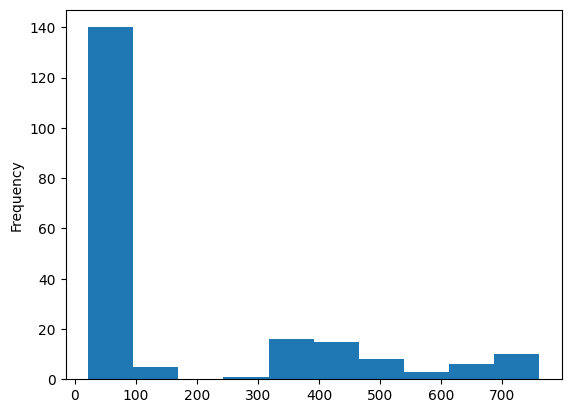

In [22]:
# sns.histplot(data=data1Bed, x="Price(Lacs)", kde=True)
data1Bed["Price(Lacs)"].plot.hist()

In [23]:
data1Bed.describe()

,Price(Lacs),Bedrooms,Bathrooms,Area(Sq.Yards)
count,204.000000,204.0,204.000000,204.000000
mean,178.048676,1.0,1.250000,85.725490
std,216.434929,0.0,0.434078,42.587877
min,22.000000,1.0,1.000000,33.000000
25%,42.875000,1.0,1.000000,50.000000
50%,60.000000,1.0,1.000000,64.000000
75%,365.750000,1.0,1.250000,124.250000
max,760.000000,1.0,2.000000,183.000000


In [24]:
# sns.kdeplot(data=data1Bed, x="Price(Lacs)")

In [25]:
# sns.displot(data1Bed, x="Price(Lacs)", kind="kde")

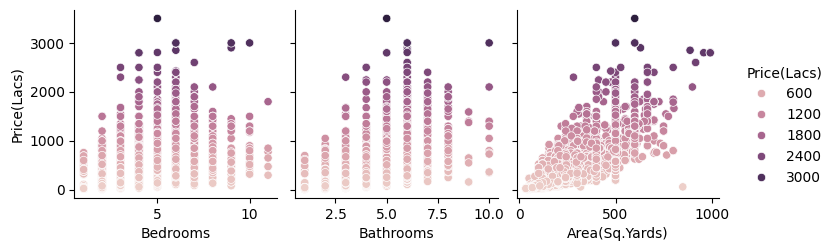

In [31]:
sns.pairplot(
    house_price,
    y_vars=["Price(Lacs)"],
    x_vars=["Bedrooms", "Bathrooms", "Area(Sq.Yards)"],
    hue="Price(Lacs)"
)

In [67]:
house_price.sample(5)

,Address,Price(Lacs),Bedrooms,Bathrooms,Area(Sq.Yards),Area
5273,"Diamond Tower & Shopping Mall, Gulshan-e-Mayma...",55.0,2.0,2.0,122,Diamond Tower
7472,"Bahria Sports City, Bahria Town Karachi",230.0,4.0,4.0,350,Bahria Sports
1406,"Shahmir Residency, University Road",150.0,4.0,4.0,120,Shahmir Residency
13900,"Gulshan-e-Iqbal - Block 7, Gulshan-e-Iqbal",120.0,2.0,2.0,117,Gulshan-e-Iqbal
10305,"DHA Phase 8, DHA Defence",960.0,6.0,6.0,500,DHA
